# A baseline Neural Network

This notebook contains a simple convolutional neural network that serves as baseline for other methods.

In [1]:
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt

In [3]:
from keras.layers import Dense, Flatten, Activation, Dropout, Input
from keras.models import Model
from keras.layers.convolutional import Conv2D, MaxPooling2D

import json
import numpy as np

import utils

/Users/thead/anaconda/envs/toolbox-talk/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


## Data loading and augmentation

We augment the dataset by adding rotations and flips of the original images to the training data.

In [4]:
X, y = utils.load_data(one_hot=True)

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

def augment(X, y):
    X_prime = np.concatenate((
        X,
        np.rot90(X, 1, (1,2)),
        np.rot90(X, 2, (1,2)),
        np.rot90(X, 3, (1,2)),
        np.flip(X, 1),
        np.flip(X, 1)
        ))
    y_prime = np.concatenate((y, y, y, y, y, y))
    return X_prime, y_prime

X_train, y_train = augment(X_train, y_train)

In [6]:
X_train.shape, y_train.shape

((12600, 80, 80, 3), (12600, 2))

## Network definition and training

A three layer convnet with pooling and dropout.

In [7]:
x = Input(shape=(80, 80, 3))

h = Conv2D(32, (3,3), padding='same', activation='relu')(x)
h = MaxPooling2D(pool_size=(2,2))(h)
h = Dropout(0.25)(h)

h = Conv2D(32, (3,3), padding='same', activation='relu')(x)
h = MaxPooling2D(pool_size=(2,2))(h)
h = Dropout(0.25)(h)

h = Conv2D(32, (3,3), padding='same', activation='relu')(x)
h = MaxPooling2D(pool_size=(2,2))(h)
h = Dropout(0.25)(h)

d = Flatten()(h)
y = Dense(2, activation='softmax')(d)

model = Model(x, y)

In [8]:
model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

In [9]:
history = model.fit(X_train,
                    y_train,
                    epochs=10,
                    validation_split=0.2)

Train on 10080 samples, validate on 2520 samples
Epoch 1/10
10080/10080 [==============================] - 82s 8ms/step - loss: 0.3879 - acc: 0.8304 - val_loss: 0.3449 - val_acc: 0.8405
Epoch 2/10
10080/10080 [==============================] - 75s 7ms/step - loss: 0.2700 - acc: 0.8814 - val_loss: 0.2448 - val_acc: 0.8929
Epoch 3/10
10080/10080 [==============================] - 75s 7ms/step - loss: 0.2215 - acc: 0.9077 - val_loss: 0.2310 - val_acc: 0.8913
Epoch 4/10
10080/10080 [==============================] - 76s 8ms/step - loss: 0.2019 - acc: 0.9136 - val_loss: 0.1923 - val_acc: 0.9210
Epoch 5/10
10080/10080 [==============================] - 80s 8ms/step - loss: 0.1906 - acc: 0.9213 - val_loss: 0.2039 - val_acc: 0.9083
Epoch 6/10
10080/10080 [==============================] - 84s 8ms/step - loss: 0.1810 - acc: 0.9236 - val_loss: 0.1913 - val_acc: 0.9254
Epoch 7/10
10080/10080 [==============================] - 71s 7ms/step - loss: 0.1757 - acc: 0.9260 - val_loss: 0.1978 - val_acc:

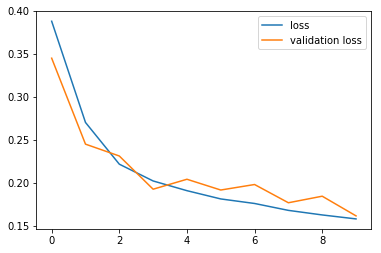

In [10]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='validation loss')
plt.legend(loc='best');

In [13]:
loss, accuracy = model.evaluate(x=X_test, y=y_test,
                                verbose=1)

700/700 [==============================] - 1s 2ms/step


In [14]:
print("Test accuracy:", accuracy)

Test accuracy: 0.9457142846924919


## Store model

Store the model for later use in production.

In [12]:
model.save("conv-net.h5")